### 생선 분류 - 최적의 K 찾기 : 하이퍼 파라미터
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습방법 : 지도학습 => 분류
- 학습알고리즘 : 최근접이웃알고리즘
- 하이퍼파라미터 튜닝 : 모델 성능 개선

[1] 데이터 준비


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_FILE = '../Data/fish.csv'

In [4]:
# 행 : Bream, Smelt 컬럼 : Species, Weight, Length => 0, 1, 2
fishDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [5]:
mask = (fishDF['Species'] == 'Bream') | (fishDF['Species'] == 'Smelt')

In [6]:
twoDF = fishDF[mask]
twoDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [7]:
twoDF.reset_index(drop=True, inplace=True)

In [8]:
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [9]:
# Species 컬럼을 수치화 => Bream: 0, Smelt: 1
twoDF['fishcode'] = twoDF.Species.replace({'Bream': 0, 'Smelt': 1})

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_18256\4063027218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['fishcode'] = twoDF.Species.replace({'Bream': 0, 'Smelt': 1})


In [10]:
twoDF.head(10)

,Species,Weight,Length,fishcode
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0
5,Bream,450.0,29.7,0
6,Bream,500.0,29.7,0
7,Bream,390.0,30.0,0
8,Bream,450.0,30.0,0
9,Bream,500.0,30.7,0


[2] 피처와 타겟 분리

In [11]:
features = twoDF[['Weight', 'Length']]
target = twoDF['fishcode']

print(f'feature => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

feature => (49, 2), 2D
target => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# train:test = 80:20 ==> test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : *분류*일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
X_train, X_test, Y_train, Y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    stratify=target,
                                                    random_state=10)

In [14]:
print(f'X_train: {X_train.shape}, {X_train.ndim}D')
print(f'Y_train: {Y_train.shape}, {Y_train.ndim}D')

print(f'X_test: {X_test.shape}, {X_test.ndim}D')
print(f'Y_test: {Y_test.shape}, {Y_test.ndim}D')

X_train: (39, 2), 2D
Y_train: (39,), 1D
X_test: (10, 2), 2D
Y_test: (10,), 1D


In [15]:
Y_train.head()

7     0
43    1
1     0
46    1
31    0
Name: fishcode, dtype: int64

In [16]:
# target 0(Bream), 1(Smelt)의 비율
Y_train.value_counts()

fishcode
0    28
1    11
Name: count, dtype: int64

In [17]:
Y_train.shape

(39,)

In [18]:
Y_train.value_counts()[0]/Y_train.shape[0], Y_train.value_counts()[1]/Y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [19]:
Y_test.value_counts()[0]/Y_test.shape[0], Y_test.value_counts()[1]/Y_test.shape[0]

(0.7, 0.3)

[3-2] 피쳐 스케일링

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [22]:
# 스케일러 데이터셋에 속성값 설정
mmScaler.fit(X_train)

MinMaxScaler()

In [23]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [24]:
X_train.min(), X_train.max()

(Weight    6.7
 Length    9.8
 dtype: float64,
 Weight    1000.0
 Length      41.0
 dtype: float64)

In [25]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_train_scaled=mmScaler.transform(X_train)
X_train_scaled.shape

(39, 2)

In [26]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_test_scaled=mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [30]:
model.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

In [31]:
# 학습 후 모델 파라미터
model.classes_, model.n_samples_fit_

# model.feature_names_in_ ndarray일 경우 X

(array([0, 1], dtype=int64), 39)

[5] 모델 성능평가 ==> score() 메서드 + 테스트 데이터셋

In [32]:
model.score(X_test_scaled, Y_test)

1.0

[6] 최적의 K 개수 찾기 ==> 모델의 성능 영향 미치는 파라미터
- 하이퍼파라미터

In [33]:
# K의 범위 : 1 ~ 전체 데이터 개수

scores, points=[], []
for k in range(1, 40):
    # 최근접 이웃 데이터 수 설정
    model.n_neighbors=k

    # # 모델 예측 값 추출
    # model.fit(X_train_scaled)

    # 점수 계산
    jumsu = model.score(X_test_scaled, Y_test)

    if k>1:
        if jumsu != scores[-1]: points.append(k)
    scores.append(jumsu)

In [34]:
points

[22]

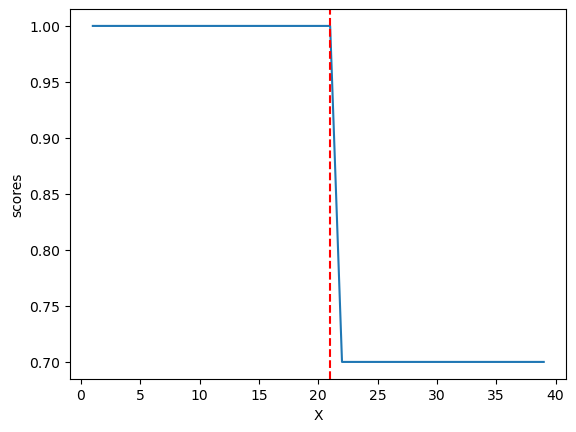

In [35]:
# x축 k, y축 점수
plt.plot(range(1,40), scores)
plt.xlabel('X')
plt.ylabel('scores')
plt.axvline(points[0]-1, 0.0, 1.0, color='r', linestyle='dashed')
plt.show()

[7] 예측하기 ==> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의사항 : 입력데이터 ==> 2D

In [36]:
new_data = pd.DataFrame([[413, 27.1]], columns=[['Weight','Length']])
new_data

,Weight,Length
0,413,27.1


In [37]:
mmScaler.data_range_, mmScaler.transform(new_data)

c:\Users\KDP-50\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


(array([993.3,  31.2]), array([[0.40904057, 0.55448718]]))

In [38]:
new_data_scaled= mmScaler.transform(new_data)
new_data_scaled

c:\Users\KDP-50\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.40904057, 0.55448718]])

In [39]:
model.predict(new_data)

array([0], dtype=int64)

In [40]:
### 최근접한 k개 데이터 찾기
distance, index = model.kneighbors(new_data_scaled)

In [41]:
distance

array([[0.0632567 , 0.0759668 , 0.07900846, 0.09127965, 0.09578948,
        0.10013488, 0.12089623, 0.1264565 , 0.13971769, 0.15263176,
        0.1660111 , 0.17339619, 0.24516819, 0.27478766, 0.2853277 ,
        0.31465358, 0.31572632, 0.34531684, 0.35198645, 0.36927875,
        0.38418326, 0.39954672, 0.55409749, 0.60584612, 0.61953815,
        0.62772152, 0.63166601, 0.63652661, 0.64970947, 0.6508822 ,
        0.65152023, 0.65660869, 0.65669344, 0.6683902 , 0.67062249,
        0.67075869, 0.68903572, 0.70053837, 0.7201395 ]])

In [42]:
index.reshape(-1).tolist()

[25,
 17,
 22,
 21,
 0,
 6,
 29,
 2,
 10,
 36,
 12,
 37,
 33,
 30,
 23,
 11,
 31,
 9,
 14,
 24,
 26,
 16,
 5,
 3,
 20,
 35,
 1,
 27,
 28,
 18,
 15,
 19,
 4,
 13,
 32,
 7,
 8,
 38,
 34]

In [43]:
neighbors = index.reshape(-1).tolist()

In [44]:
k_weight=X_train_scaled[neighbors][:,0]
k_length=X_train_scaled[neighbors][:,1]

In [45]:
X_train_scaled

array([[3.85885432e-01, 6.47435897e-01],
       [3.12091010e-03, 7.05128205e-02],
       [2.85210913e-01, 5.28846154e-01],
       [5.53709856e-03, 1.02564103e-01],
       [9.54696466e-01, 9.19871795e-01],
       [1.32890365e-02, 1.66666667e-01],
       [4.46290144e-01, 6.47435897e-01],
       [1.00000000e+00, 8.71794872e-01],
       [0.00000000e+00, 0.00000000e+00],
       [6.97976442e-01, 7.43589744e-01],
       [4.71458774e-01, 6.79487179e-01],
       [6.47639183e-01, 7.59615385e-01],
       [4.96627404e-01, 6.95512821e-01],
       [3.02023558e-04, 2.56410256e-02],
       [6.82875264e-01, 7.75641026e-01],
       [3.12091010e-03, 4.48717949e-02],
       [7.18111346e-01, 8.07692308e-01],
       [3.35548173e-01, 5.35256410e-01],
       [9.24494111e-01, 9.51923077e-01],
       [3.02023558e-03, 3.84615385e-02],
       [6.74519279e-03, 8.33333333e-02],
       [4.46290144e-01, 6.37820513e-01],
       [3.58703312e-01, 6.15384615e-01],
       [6.07369375e-01, 7.59615385e-01],
       [6.778415

In [46]:
X_train_scaled[:,0], X_train_scaled[:,1]

(array([3.85885432e-01, 3.12091010e-03, 2.85210913e-01, 5.53709856e-03,
        9.54696466e-01, 1.32890365e-02, 4.46290144e-01, 1.00000000e+00,
        0.00000000e+00, 6.97976442e-01, 4.71458774e-01, 6.47639183e-01,
        4.96627404e-01, 3.02023558e-04, 6.82875264e-01, 3.12091010e-03,
        7.18111346e-01, 3.35548173e-01, 9.24494111e-01, 3.02023558e-03,
        6.74519279e-03, 4.46290144e-01, 3.58703312e-01, 6.07369375e-01,
        6.77841538e-01, 4.26155240e-01, 6.97976442e-01, 3.22158462e-03,
        2.01349039e-03, 4.96627404e-01, 5.72133293e-01, 6.17436827e-01,
        8.05396154e-04, 5.97301923e-01, 9.74831370e-01, 9.19460385e-01,
        4.96627404e-01, 3.35548173e-01, 9.49662740e-01]),
 array([0.6474359 , 0.07051282, 0.52884615, 0.1025641 , 0.91987179,
        0.16666667, 0.6474359 , 0.87179487, 0.        , 0.74358974,
        0.67948718, 0.75961538, 0.69551282, 0.02564103, 0.77564103,
        0.04487179, 0.80769231, 0.53525641, 0.95192308, 0.03846154,
        0.08333333, 0.

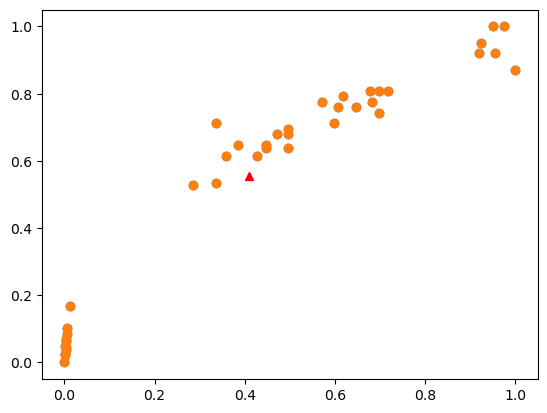

In [47]:
### 시각화로 확인

plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1]) # 스케일링된 X_train
plt.scatter(k_weight, k_length)
plt.plot(new_data_scaled[0,0], new_data_scaled[0,1], 'r^')
plt.show()